In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import PIL
from PIL import Image


In [47]:
results = pd.read_csv('/Volumes/CatBreen/aurora_outputs/snow_poles_outputs_resized_LRe4_BS64_E100_clean_SNEX_IN/eval/results.csv')
results.head()

,Unnamed: 0,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,y2_pred,top_pixel_error,bottom_pixel_error,total_length_pixel,total_length_pixel_actual,automated_depth,manual_snowdepth,difference
0,0,W2B,W2B_WSCT0020.JPG,135.67105,72.996490,135.37631,186.43742,135.88866,74.563835,135.54382,183.40360,1.582378,3.038450,108.840309,113.441315,10.665601,-1.764,-12.429601
1,1,W2B,W2B_WSCT0024.JPG,136.11316,72.996490,136.40790,187.22339,135.81169,73.541466,135.78185,184.97597,0.622801,2.332990,111.434509,114.227280,3.658175,-3.888,-7.546175
2,2,W2B,W2B_WSCT0025.JPG,136.11316,72.996490,135.81842,185.91345,135.63493,72.851580,135.65598,183.99530,0.499699,1.925018,111.143723,112.917343,4.443996,-0.348,-4.791996
3,3,W2B,W2B_WSCT0036.JPG,136.26053,72.734505,136.26053,186.43742,135.87595,73.493980,135.83720,185.01791,0.851297,1.481287,111.523941,113.702919,3.416470,-2.472,-5.888470
4,4,W2B,W2B_WSCT0050.JPG,136.11316,78.236260,136.40790,191.15321,136.39491,77.997250,135.94210,189.76169,0.369471,1.467418,111.765350,112.917336,2.758759,-0.348,-3.106759


In [48]:
## average error at each camera 
summary = results.groupby(['Camera']).mean()

In [49]:
dateinfo = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/labeledImgs_datetime_info.csv')
dateinfo.rename(columns={'filenames':'filename'}, inplace=True)
results = results.merge(dateinfo, on = 'filename', how='left')

In [50]:
results["date"] = pd.to_datetime(results["datetimes"])


In [51]:
results.head()

,Unnamed: 0_x,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,...,top_pixel_error,bottom_pixel_error,total_length_pixel,total_length_pixel_actual,automated_depth,manual_snowdepth,difference,Unnamed: 0_y,datetimes,date
0,0,W2B,W2B_WSCT0020.JPG,135.67105,72.996490,135.37631,186.43742,135.88866,74.563835,135.54382,...,1.582378,3.038450,108.840309,113.441315,10.665601,-1.764,-12.429601,13299,2019/09/30 11:00,2019-09-30 11:00:00
1,1,W2B,W2B_WSCT0024.JPG,136.11316,72.996490,136.40790,187.22339,135.81169,73.541466,135.78185,...,0.622801,2.332990,111.434509,114.227280,3.658175,-3.888,-7.546175,13454,2019/10/02 11:00,2019-10-02 11:00:00
2,2,W2B,W2B_WSCT0025.JPG,136.11316,72.996490,135.81842,185.91345,135.63493,72.851580,135.65598,...,0.499699,1.925018,111.143723,112.917343,4.443996,-0.348,-4.791996,13437,2019/10/02 12:00,2019-10-02 12:00:00
3,3,W2B,W2B_WSCT0036.JPG,136.26053,72.734505,136.26053,186.43742,135.87595,73.493980,135.83720,...,0.851297,1.481287,111.523941,113.702919,3.416470,-2.472,-5.888470,13360,2019/10/08 11:00,2019-10-08 11:00:00
4,4,W2B,W2B_WSCT0050.JPG,136.11316,78.236260,136.40790,191.15321,136.39491,77.997250,135.94210,...,0.369471,1.467418,111.765350,112.917336,2.758759,-0.348,-3.106759,13225,2019/10/15 11:00,2019-10-15 11:00:00


In [94]:
print(len(results['Camera']))
print(len(pd.unique(results['Camera'])))

892
20


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


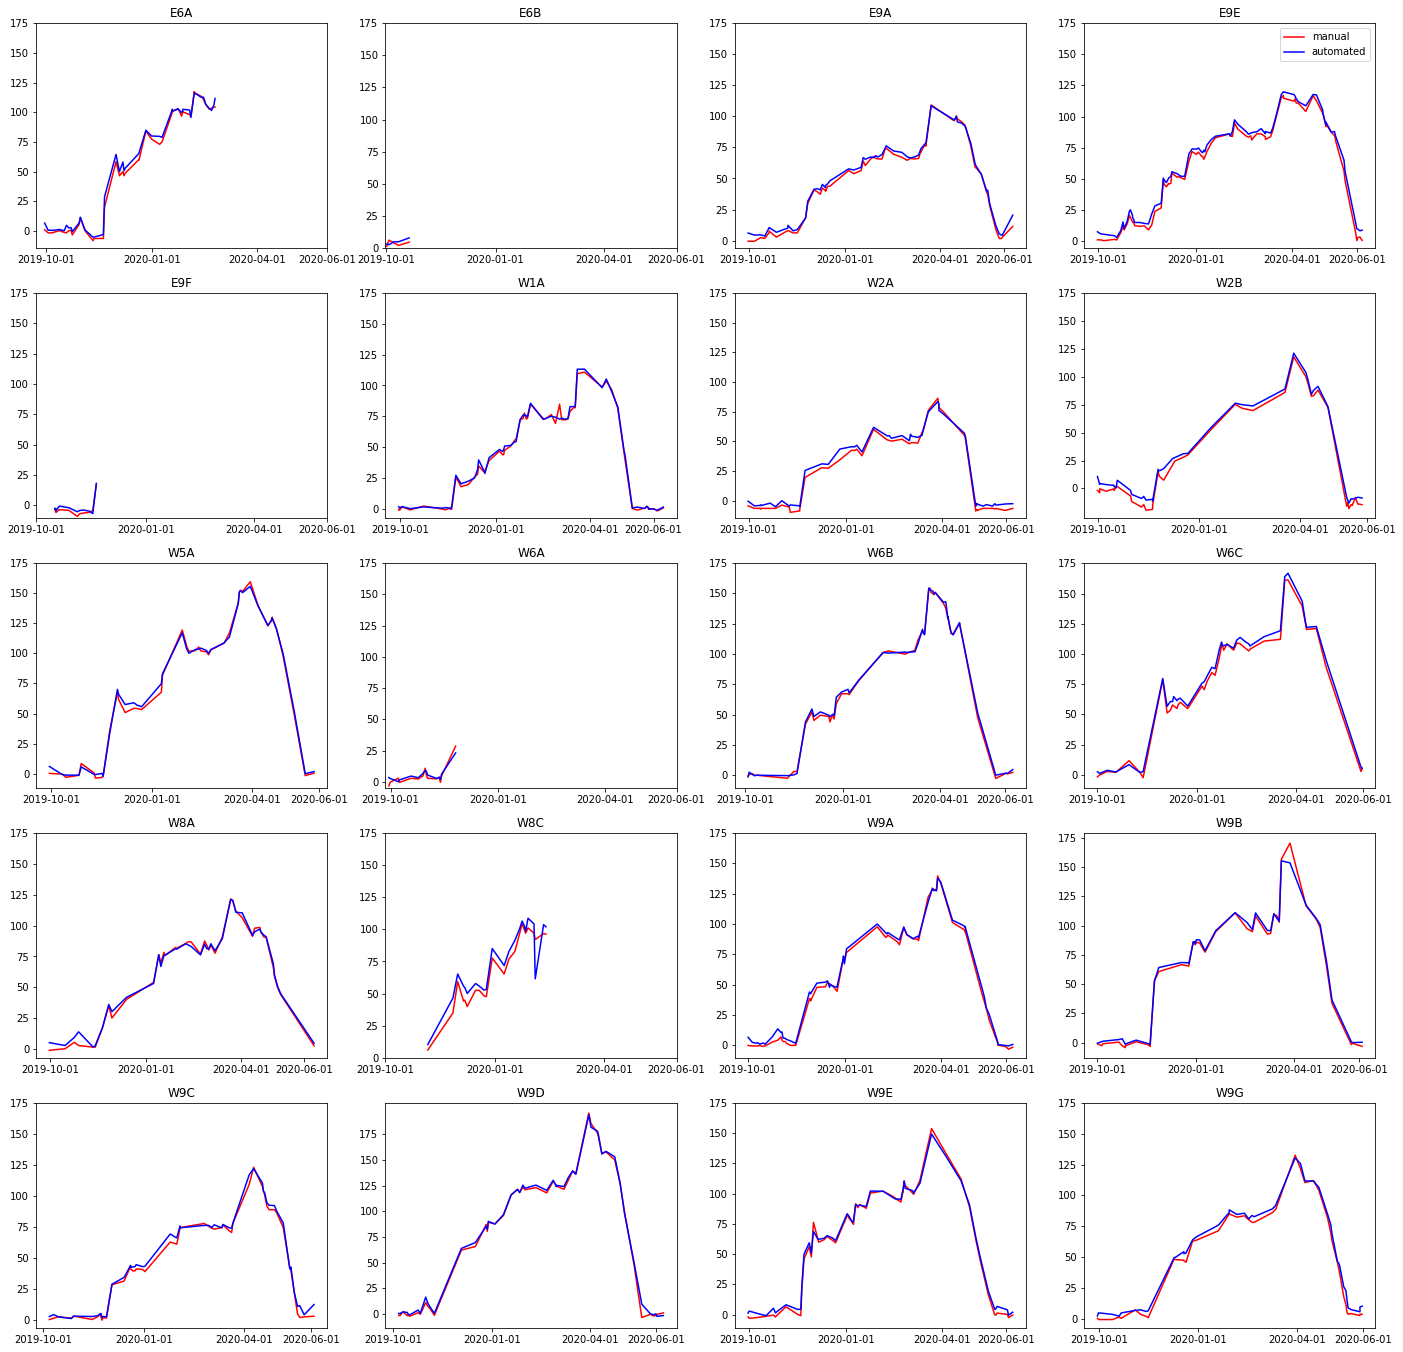

In [54]:
## plot all 20 cameras 

camera_list = sorted(pd.unique(results['Camera']))

fig, axs = plt.subplots(5, 4, figsize=(24, 24))
rows = 5
cols = 4
idx = 0
for row in range(rows):
    for col in range(cols):
        subset = results[results['Camera'] == camera_list[idx]]
        #plt.plot(subset["date"],pd.to_numeric(subset['manual_snowdepth']), color = 'red', label = 'manual') ##actual
        #plt.plot(subset["date"],pd.to_numeric(subset['automated_depth']), color = 'blue', label = 'automated') ## pred
        #plt.xticks([pd.to_datetime('2019-10-01'),pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'),pd.to_datetime('2020-06-01')])
        #plt.legend()
        #plt.ylabel('snow depth (cm)')
        axs[row, col].plot(subset["date"],pd.to_numeric(subset['manual_snowdepth']), color = 'red', label = 'manual') ##actual
        axs[row, col].plot(subset["date"],pd.to_numeric(subset['automated_depth']), color = 'blue', label = 'automated') ## pred
        axs[row, col].set_xticks([pd.to_datetime('2019-10-01'),pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'),pd.to_datetime('2020-06-01')])
        axs[row, col].set_yticks([0, 25, 50, 75, 100, 125, 150, 175])
        axs[row,col].title.set_text(camera_list[idx])
        axs[0,3].legend()
        idx += 1

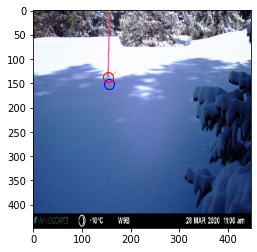

In [103]:
test = results[results['Camera'] == 'W9B']
test = test[test['date'] == '2020-03-28 11:00:00']
image = Image.open('/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W9B/W9B_WSCT0379.JPG')

b_pred = [test['x2_pred'].iloc[0], test['y2_pred'].iloc[0]]
b_actual = [test['x2_true'].iloc[0], test['y2_true'].iloc[0]]

b_pred = np.array(b_pred, dtype='float32')
b_actual = np.array(b_actual, dtype='float32')

b_pred = b_pred * [448 / 224, 448 / 224] ### o
b_actual = b_actual * [448 / 224, 448 / 224] ### o

plt.imshow(image)
plt.plot(b_pred[0], b_pred[1], 'b.',  mfc='none', markersize=20)
plt.plot(b_actual[0], b_actual[1],  'r.',  mfc='none', markersize=20)


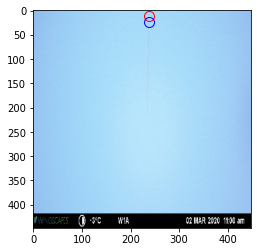

In [56]:
test = results[results['Camera'] == 'W1A']
test = test[test['date'] == '2020-03-02 11:00:00']
image = Image.open('/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W1A/W1A_WSCT0324.JPG')

b_pred = [test['x1_pred'].iloc[0], test['y1s_pred'].iloc[0]]
b_actual = [test['x1_true'].iloc[0], test['y1_true'].iloc[0]]

b_pred = np.array(b_pred, dtype='float32')
b_actual = np.array(b_actual, dtype='float32')

b_pred = b_pred * [448 / 224, 448 / 224] ### o
b_actual = b_actual * [448 / 224, 448 / 224] ### o

plt.imshow(image)
plt.plot(b_pred[0], b_pred[1], 'r.',  mfc='none', markersize=20)
plt.plot(b_actual[0], b_actual[1],  'b.',  mfc='none', markersize=20)


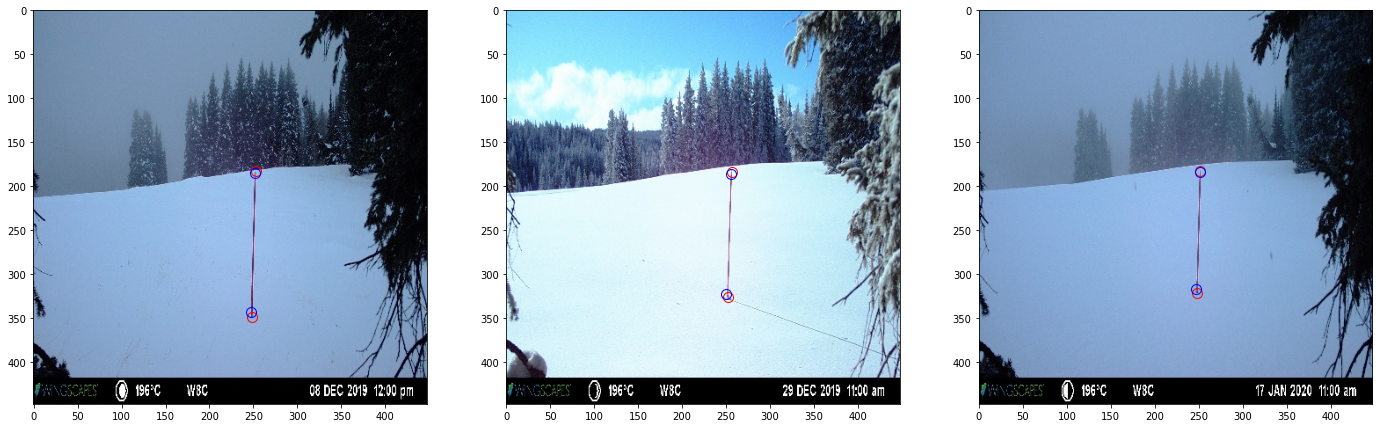

In [186]:
## W8C analysis:
W8C = results[results['Camera'] == 'W8C']
W8C_error1 = W8C[W8C['date'] == '2019-12-08 12:00:00']
W8C_error2 = W8C[W8C['date'] == '2019-12-29 11:00:00']
W8C_error3 = W8C[W8C['date'] == '2020-01-17 11:00:00']
image1 = Image.open('/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W8C/W8C_WSCT0145.JPG')
image2 = Image.open('/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W8C/W8C_WSCT0186.JPG')
image3 = Image.open('/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W8C/W8C_WSCT0224.JPG')

W8C_list = [W8C_error1, W8C_error2, W8C_error3]
W8C_imgList = ['/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W8C/W8C_WSCT0145.JPG', '/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W8C/W8C_WSCT0186.JPG',
                '/Volumes/CatBreen/CV4ecology/SNEX20_TLI_resized_clean/W8C/W8C_WSCT0224.JPG']
W8C_dic = zip(W8C_list, W8C_imgList)
W8C_dic
## top point

fig, axs = plt.subplots(1, 3, figsize=(24, 24))
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
cols = [0,1,2]

for i, item in enumerate(W8C_list):
    t_pred = [item['x1_pred'].iloc[0], item['y1s_pred'].iloc[0]]
    t_actual = [item['x1_true'].iloc[0], item['y1_true'].iloc[0]]

    t_pred = np.array(t_pred, dtype='float32')
    t_actual = np.array(t_actual, dtype='float32')

    t_pred = t_pred * [448 / 224, 448 / 224] ### o
    t_actual = t_actual * [448 / 224, 448 / 224] ### o

    ## bottom point
    b_pred = [item['x2_pred'].iloc[0], item['y2_pred'].iloc[0]]
    b_actual = [item['x2_true'].iloc[0], item['y2_true'].iloc[0]]

    b_pred = np.array(b_pred, dtype='float32')
    b_actual = np.array(b_actual, dtype='float32')

    b_pred = b_pred * [448 / 224, 448 / 224] ### o
    b_actual = b_actual * [448 / 224, 448 / 224] ### o

    image = Image.open(W8C_imgList[i])
    axs[cols[i]].imshow(image)
    axs[cols[i]].plot(t_actual[0], t_actual[1],  'r.', mfc='none', markersize=20)
    axs[cols[i]].plot(t_pred[0], t_pred[1], 'b.',  mfc='none', markersize=20)
    axs[cols[i]].plot(b_actual[0], b_actual[1],  'r.', mfc='none', markersize=20)
    axs[cols[i]].plot(b_pred[0], b_pred[1], 'b.', mfc='none', markersize=20)



In [57]:
## keep digging into results; group by camera: 
camResultsAvg = results.groupby(['Camera']).mean()[['top_pixel_error','bottom_pixel_error','difference']]
camResultsAvg

,top_pixel_error,bottom_pixel_error,difference
Camera,,,
E6A,1.172303,2.017861,-2.457629
E6B,1.447010,2.385625,-1.014296
E9A,1.180983,1.730116,-2.053782
E9E,1.142479,1.963923,-3.568139
E9F,1.589650,1.845837,-1.628501
W1A,0.815617,0.888176,-0.957157
W2A,0.798549,1.598361,-2.911779
W2B,0.858735,1.766777,-4.543536
W5A,1.001619,1.224367,-0.761639


In [58]:
camResultsStd = results.groupby(['Camera']).std()[['top_pixel_error','bottom_pixel_error','difference']]
camResultsStd

,top_pixel_error,bottom_pixel_error,difference
Camera,,,
E6A,0.820179,1.339423,2.485848
E6B,0.574288,0.433387,2.744054
E9A,0.471103,0.881556,1.950219
E9E,0.411301,0.691838,2.122055
E9F,0.464362,0.715468,1.693859
W1A,0.745266,0.570021,2.377508
W2A,0.371000,0.694046,2.405257
W2B,0.325158,0.848715,2.844243
W5A,1.175580,1.207712,2.480902


In [59]:
## new plot for distance from camera with line of best fit 
## 
conversions = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/snowfree_table.csv')
conversions.head()

,camera,snow_free_pixels,conversion,std,snow_free_cm
0,BUNKHOUSE-U-01,na,na,NaN,151.50
1,CEDAR-H-01,na,na,NaN,125.00
2,CEDAR-L-01,na,na,NaN,125.00
3,CEDAR-M-01,na,na,NaN,122.20
4,CHE10,852.9433527,0.127,NaN,121.92


In [60]:
dist_from_cam = camResultsAvg.merge(conversions, left_on='Camera', right_on='camera')
dist_from_cam.head()

,top_pixel_error,bottom_pixel_error,difference,camera,snow_free_pixels,conversion,std,snow_free_cm
0,1.172303,2.017861,-2.457629,E6A,2833.529236,0.11,NaN,304.8
1,1.447010,2.385625,-1.014296,E6B,2398.715621,0.126,NaN,304.8
2,1.180983,1.730116,-2.053782,E9A,2545.209329,0.122,NaN,304.8
3,1.142479,1.963923,-3.568139,E9E,2254.816373,0.137,NaN,304.8
4,1.589650,1.845837,-1.628501,E9F,2224.872478,0.137,NaN,304.8


Text(0.5, 0, 'cm/pixel conversion')

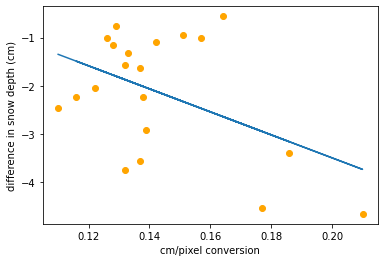

In [61]:
# The cm/pixel conversion is smaller when the poles are further away, so we used these values to 
# assess if accuracy increases when the pole is closer to the camera.  
# We would expect that images with bigger conversions to have accuracy closer to zero, then images with smaller conversions

#find line of best fit
a, b = np.polyfit(dist_from_cam['conversion'].astype(float),dist_from_cam['difference'], 1)
#add points to plot
plt.scatter(dist_from_cam['conversion'].astype(float),dist_from_cam['difference'], color = 'orange')
#add line of best fit to plot
plt.plot(dist_from_cam['conversion'].astype(float), a*dist_from_cam['conversion'].astype(float)+b)
plt.ylabel('difference in snow depth (cm)')
plt.xlabel('cm/pixel conversion')

In [62]:
## linear regression to see if p-value associated with line is significant:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#initiate linear regression model
model = LinearRegression()

#dist_from_cam['conversion'].astype(float),dist_from_cam['difference']

#define predictor and response variables
X = np.array(dist_from_cam['conversion'].astype(float)).reshape(-1, 1)
#y_abs = np.absolute(np.array(summary['sd_diff']))
y = np.array(dist_from_cam['difference'])

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

#### using the statsmodels.api package:
X = sm.add_constant(X)
stats_model = sm.OLS(y,X)
model_results = stats_model.fit()

# get p value: 
p_values = model_results.pvalues
print('\n pvalues:',p_values)
print('coefficients',model_results.summary())

0.21538816738851108
intercept: 1.2768824477986458
slope: [-23.86813077]

 pvalues: [0.42384939 0.03927155]
coefficients                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     4.941
Date:                Sun, 25 Jun 2023   Prob (F-statistic):             0.0393
Time:                        10:50:54   Log-Likelihood:                -30.248
No. Observations:                  20   AIC:                             64.50
Df Residuals:                      18   BIC:                             66.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


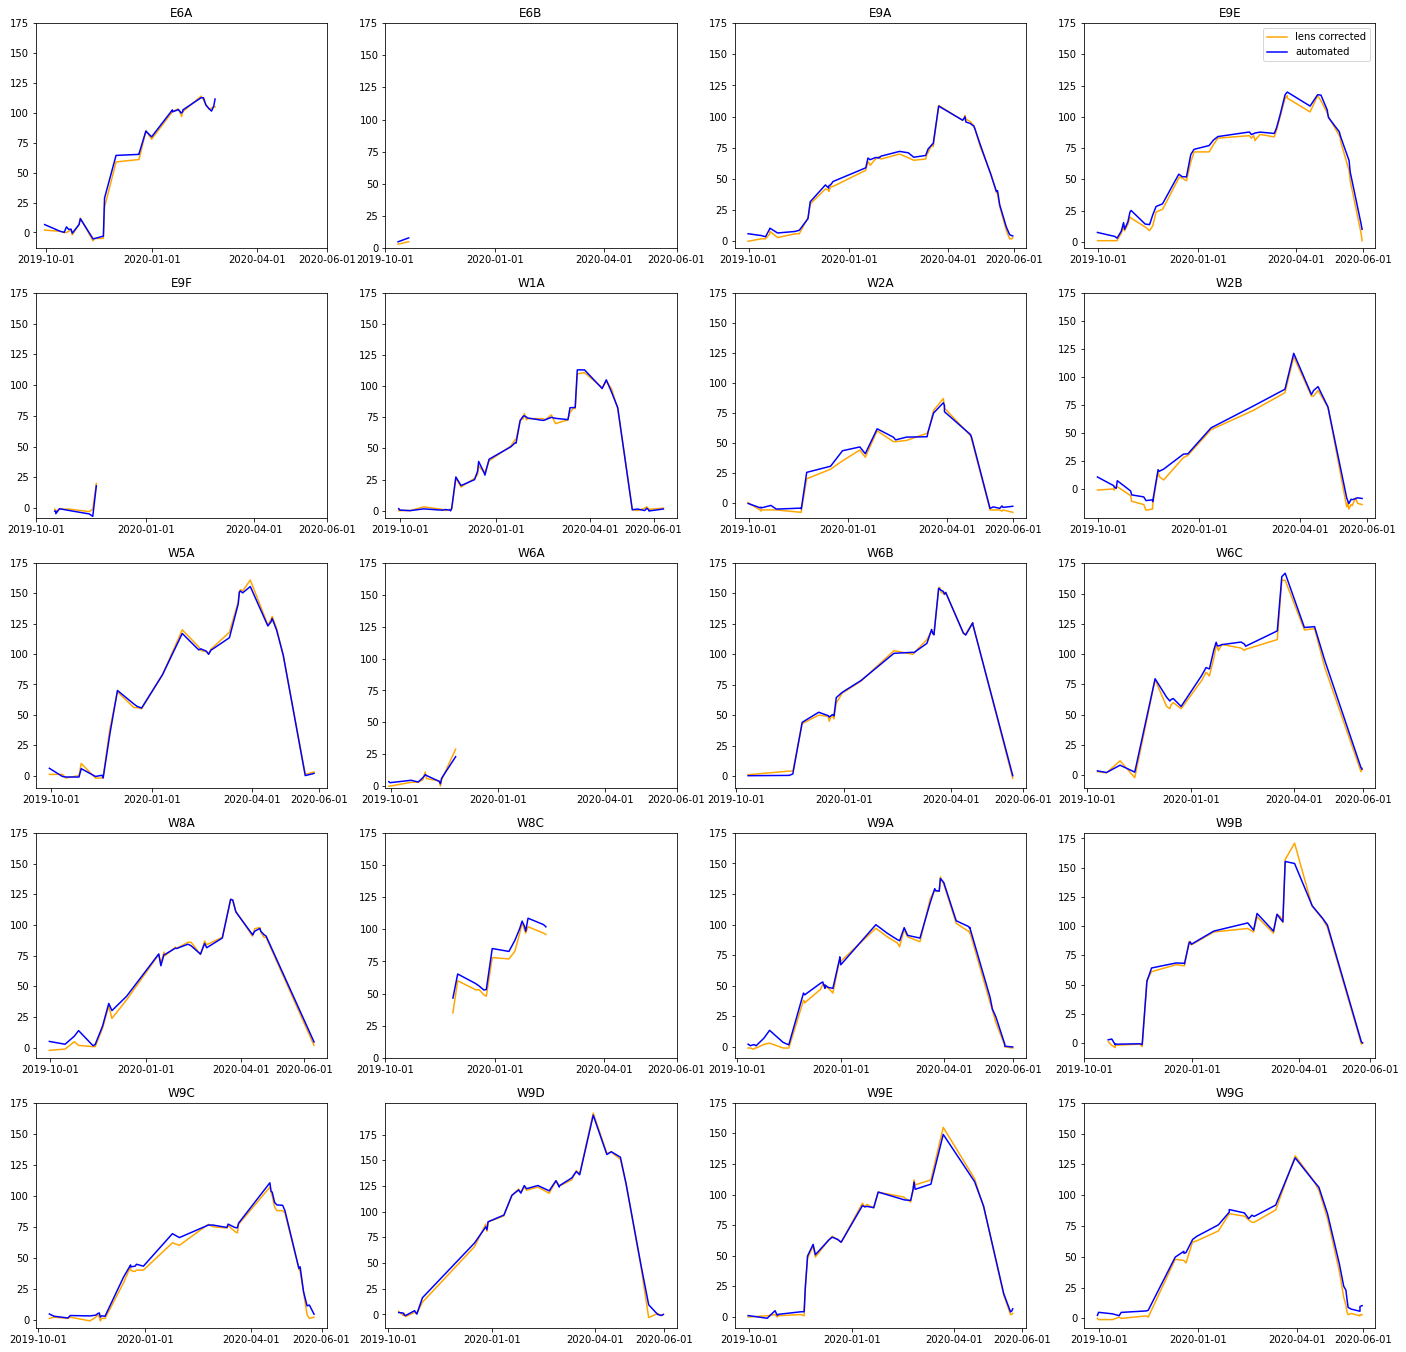

In [88]:
## compare to dataset with correction for lens distortion: 
pubData = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/data/SNEX20_TLI_snowdepth_filenames.csv')
lens_distortion = results.merge(pubData, left_on='filename', right_on='filename')
## join with lens distortion camera 
lens_distortion
lens_distortion["date"] = pd.to_datetime(lens_distortion["datetimes"])

camera_list_ld = sorted(pd.unique(lens_distortion['Camera_x']))
camera_list_ld
fig, axs = plt.subplots(5, 4, figsize=(24, 24))
rows = 5
cols = 4
idx = 0
for row in range(rows):
    for col in range(cols):
        subset = lens_distortion[lens_distortion['Camera_x'] == camera_list_ld[idx]]
        axs[row, col].plot(subset["date"],pd.to_numeric(subset['Snow Depth (cm)']), color = 'orange', label = 'lens corrected') ##actual
        axs[row, col].plot(subset["date"],pd.to_numeric(subset['automated_depth']), color = 'blue', label = 'automated') ## pred
        axs[row,col].set_xticks([pd.to_datetime('2019-10-01'),pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'),pd.to_datetime('2020-06-01')])
        axs[row, col].set_yticks([0, 25, 50, 75, 100, 125, 150, 175])
        axs[row,col].title.set_text(camera_list_ld[idx])
        axs[0,3].legend()
        idx += 1


In [93]:
## find the mean and std for the difference between the dataset accounting for lens distortion and the dataset that does not 
difference = lens_distortion['Snow Depth (cm)'] - lens_distortion['automated_depth']
print(difference.mean())
print(difference.std())


-1.7993750767748387
2.9303879514283206


In [ ]:
## check for how many examples the model had to be presented with to see accuracy ? probably less helpful ...
## Since we are also doing the Colorado stuff, but still 


In [108]:
dist_from_cam

,top_pixel_error,bottom_pixel_error,difference,camera,snow_free_pixels,conversion,std,snow_free_cm
0,1.172303,2.017861,-2.457629,E6A,2833.529236,0.11,NaN,304.8
1,1.447010,2.385625,-1.014296,E6B,2398.715621,0.126,NaN,304.8
2,1.180983,1.730116,-2.053782,E9A,2545.209329,0.122,NaN,304.8
3,1.142479,1.963923,-3.568139,E9E,2254.816373,0.137,NaN,304.8
4,1.589650,1.845837,-1.628501,E9F,2224.872478,0.137,NaN,304.8
5,0.815617,0.888176,-0.957157,W1A,2053.454489,0.151,NaN,304.8
6,0.798549,1.598361,-2.911779,W2A,2219.124449,0.139,NaN,304.8
7,0.858735,1.766777,-4.543536,W2B,1725.29825,0.177,NaN,304.8
8,1.001619,1.224367,-0.761639,W5A,2415.61638,0.129,NaN,304.8
9,0.894929,1.178821,-1.100814,W6A,2178.015235,0.142,NaN,304.8
